# Runtime and Metrics comparison for w48 vs w03

This notebook contains some quick aggregation and plotting of the usage statistics generated with `build-gather-resource-usage-qg `.

In [14]:
from lsst.daf.butler import Butler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

butler48 = Butler('/sdf/group/rubin/repo/main', collections=['u/hchiang2/w_2022_48/usage'])
butler03 = Butler('/sdf/group/rubin/repo/main', collections=['HSC/runs/RC2/w_2023_03/DM-37570'])

# not run yet:
# butler07 = Butler('/sdf/group/rubin/repo/main', collections=['HSC/runs/RC2/w_2023_07/DM-38042'])

In [36]:
res = butler03.registry.queryDatasetTypes()
resList = list(set(res))

In [51]:
label = [("compareObjectToTruth", "analysis"),
("histPlot_skyObject", "analysis"),
("matchObjectToTruth", "analysis"),
("match_astromRefCat_objectTable", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_galaxies", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_all_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_sky_all", "analysis"),
("plot_CircAp12_sub_PSF_meas_gals_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_gals", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_stars_scatter", "analysis"),
("plot_E1Diff_magDiff_scatter", "analysis"),
("plot_E1Diff_scatter", "analysis"),
("plot_E1Diff_sky", "analysis"),
("plot_E2Diff_magDiff_scatter", "analysis"),
("plot_E2Diff_scatter", "analysis"),
("plot_E2Diff_sky", "analysis"),
("plot_PSFFluxSN_meas_sky_all", "analysis"),
("plot_RhoStatistics", "analysis"),
("plot_astromRefCat_scatter_tract_dDec", "analysis"),
("plot_astromRefCat_scatter_tract_dRA", "analysis"),
("plot_astromRefCat_sky_tract_dDec", "analysis"),
("plot_astromRefCat_sky_tract_dRA", "analysis"),
("plot_ri_gr_cmodel", "analysis"),
("plot_ri_gr_psf", "analysis"),
("plot_shapeSizeFractionalDiff_magDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_sky", "analysis"),
("plot_wFit_CModel", "analysis"),
("plot_wFit_PSF", "analysis"),
("plot_xFit_CModel", "analysis"),
("plot_xFit_PSF", "analysis"),
("plot_yFit_CModel", "analysis"),
("plot_yFit_PSF", "analysis"),
("skyPlot_skyObject", "analysis"),
("assembleCoadd", "drp"),
("calibrate", "drp"),
("characterizeImage", "drp"),
("consolidateAssocDiaSourceTable", "drp"),
("consolidateDiaSourceTable", "drp"),
("consolidateForcedSourceOnDiaObjectTable", "drp"),
("consolidateForcedSourceTable", "drp"),
("consolidateFullDiaObjectTable", "drp"),
("consolidateHealSparsePropertyMaps", "drp"),
("consolidateObjectTable", "drp"),
("consolidateSourceTable", "drp"),
("consolidateVisitSummary", "drp"),
("deblend", "drp"),
("detectAndMeasureDiaSources", "drp"),
("detection", "drp"),
("drpAssociation", "drp"),
("drpDiaCalculation", "drp"),
("finalizeCharacterization", "drp"),
("forcedPhotCcd", "drp"),
("forcedPhotCcdOnDiaObjects", "drp"),
("forcedPhotCoadd", "drp"),
("forcedPhotDiffOnDiaObjects", "drp"),
("forcedPhotDiffim", "drp"),
("getTemplate", "drp"),
("healSparsePropertyMaps", "drp"),
("isolatedStarAssociation", "drp"),
("isr", "drp"),
("makeCcdVisitTable", "drp"),
("makeVisitTable", "drp"),
("makeWarp", "drp"),
("measure", "drp"),
("mergeDetections", "drp"),
("mergeMeasurements", "drp"),
("selectGoodSeeingVisits", "drp"),
("subtractImages", "drp"),
("templateGen", "drp"),
("transformDiaSourceCat", "drp"),
("transformForcedSourceOnDiaObjectTable", "drp"),
("transformForcedSourceTable", "drp"),
("transformObjectTable", "drp"),
("transformSourceTable", "drp"),
("writeForcedSourceOnDiaObjectTable", "drp"),
("writeForcedSourceTable", "drp"),
("writeObjectTable", "drp"),
("writeSourceTable", "drp"),
         
("AB1", "faro"),
("AD1_design", "faro"),
("AD2_design", "faro"),
("AD3_design", "faro"),
("AF1_design", "faro"),
("AF2_design", "faro"),
("AF3_design", "faro"),
("AM1", "faro"),
("AM2", "faro"),
("AM3", "faro"),
("PA1", "faro"),
("PF1_design", "faro"),
("TE1", "faro"),
("TE2", "faro"),
("TE3", "faro"),
("TE4", "faro"),
("matchCatalogsPatch", "faro"),
("matchCatalogsPatchMultiBand", "faro"),
("matchCatalogsTract", "faro"),
("matchCatalogsTractGxsSNR5to80", "faro"),
("matchCatalogsTractMag17to21p5", "faro"),
("matchCatalogsTractStarsSNR5to80", "faro"),
("modelPhotRepGal1", "faro"),
("modelPhotRepGal2", "faro"),
("modelPhotRepGal3", "faro"),
("modelPhotRepGal4", "faro"),
("modelPhotRepStar1", "faro"),
("modelPhotRepStar2", "faro"),
("modelPhotRepStar3", "faro"),
("modelPhotRepStar4", "faro"),
("nsrcMeasVisit", "faro"),
("psfPhotRepStar1", "faro"),
("psfPhotRepStar2", "faro"),
("psfPhotRepStar3", "faro"),
("psfPhotRepStar4", "faro"),
("skyObjectMean", "faro"),
("skyObjectStd", "faro"),
("wPerp", "faro"),
('transformPreSourceTable', "drp"),
('writeRecalibratedSourceTable', "drp"),
('jointcal', "drp"),
('fgcmOutputProducts', "drp"),
('fgcmFitCycle', "drp"),
('writePreSourceTable', "drp"),
('skyCorr', "drp"),
('consolidatePreSourceTable', "drp"),
('fgcmBuildStarsTable', "drp")
]

labelDF = pd.DataFrame(label)
labelDF.columns = ['task', 'label']


In [50]:
#labelMatch= pd.merge(qq48, labelDF, left_on="task", right_on="task", how="left")
#labelMatch[labelMatch.label.isnull()]['task'].unique()

array(['transformPreSourceTable', 'writeRecalibratedSourceTable',
       'jointcal', 'fgcmOutputProducts', 'fgcmFitCycle',
       'writePreSourceTable', 'skyCorr', 'consolidatePreSourceTable',
       'fgcmBuildStarsTable'], dtype=object)

In [52]:

def makeqq(butler, resList):
    quantileList = []
    for rname in [r.name for r in resList if r.name.endswith('usage')]:
        try:
            parq = butler.get(rname)
        except Exception as e:
            print(e)
            continue
        df = parq.quantile([0,0.01,0.05,.32,.50,.68,.95,.99, 1], numeric_only=True).reset_index()
        df['task'] = rname.replace('_resource_usage', '')
        df['quanta'] = len(parq)
        df['integrated_runtime'] = parq["run_time"].sum()
        quantileList.append(df[["index", "quanta", "task", "memory", "init_time", "run_time", 'integrated_runtime']])

    qq = pd.concat(quantileList)
    qq["memoryGB"] = qq['memory']/1073741824
    qq['integrated_runtime_hrs'] = qq['integrated_runtime']/3600.
    return qq

def pivot(qq, labelDF):
    memoryGB = pd.pivot_table(qq, values='memoryGB', columns=['index'], index=['task'])
    runtime = pd.pivot_table(qq, values='run_time', columns=['index'], index=['task'])
    memoryGB = memoryGB.add_prefix('memGB_')
    runtime = runtime.add_prefix('runtime_')

    memrun = pd.merge(memoryGB.reset_index(), runtime.reset_index())
    memrun = pd.merge(qq[['task','quanta', 'integrated_runtime_hrs']].drop_duplicates().sort_values('task'), memrun)
    memrun = pd.merge(labelDF, memrun)
    return memrun

qq48 = makeqq(butler48, resList)
memrun48 = pivot(qq48, labelDF)

qq03 = makeqq(butler03, resList)
memrun03 = pivot(qq03, labelDF)

Dataset imageDifference_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/usage',).
Dataset writeSourceTable_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/usage',).
Dataset catalogMatchTract_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/usage',).
Dataset analyzeObjectTableSurveyCore_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/usage',).
Dataset updateVisitSummary_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/usage',).
Dataset analyzeObjectTableCore_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/usage',).
Dataset gbdesAstrometricFit_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/usage',).
Dataset refCatObjectTract_resource_usage with data ID {} could not be found in collections ('u/hchiang2/w_2022_48/us

In [17]:
memrun48

,task,label,quanta,integrated_runtime_hrs,memGB_0.0,memGB_0.01,memGB_0.05,memGB_0.32,memGB_0.5,memGB_0.68,...,memGB_1.0,runtime_0.0,runtime_0.01,runtime_0.05,runtime_0.32,runtime_0.5,runtime_0.68,runtime_0.95,runtime_0.99,runtime_1.0
0,histPlot_skyObject,analysis,3,0.000686,0.541039,0.541045,0.541072,0.541251,0.541370,0.546892,...,0.556709,0.799018,0.799625,0.802055,0.818458,0.829393,0.833116,0.838701,0.839528,0.839735
1,match_astromRefCat_objectTable,analysis,3,0.003591,1.237480,1.237525,1.237704,1.238911,1.239716,1.262416,...,1.302773,3.963158,3.967762,3.986176,4.110470,4.193333,4.401276,4.713191,4.759401,4.770953
2,plot_CModel_sub_PSFmag_meas_sky_galaxies,analysis,3,0.001135,0.662106,0.662145,0.662302,0.663363,0.664070,0.674000,...,0.691654,1.281502,1.283168,1.289829,1.334794,1.364771,1.391434,1.431428,1.437353,1.438835
3,plot_CModel_sub_PSFmag_meas_sky_stars,analysis,3,0.000936,0.661606,0.661658,0.661866,0.663273,0.664211,0.672470,...,0.687153,1.058836,1.060725,1.068280,1.119275,1.153272,1.154247,1.155710,1.155927,1.155981
4,plot_CircAp12_sub_PSF_meas_calib_psf_used_all_...,analysis,3,0.001180,0.675755,0.675809,0.676025,0.677483,0.678455,0.685499,...,0.698021,1.398226,1.398731,1.400750,1.414379,1.423466,1.424877,1.426995,1.427308,1.427387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,psfPhotRepStar3,faro,15,0.051501,0.593533,0.595315,0.602443,0.734377,0.830521,1.020729,...,1.560028,6.346191,6.369147,6.460969,9.462055,11.581596,13.281416,19.834247,20.729210,20.952950
112,psfPhotRepStar4,faro,15,0.050620,0.586895,0.589303,0.598935,0.724287,0.832630,1.019256,...,1.563942,6.194262,6.230347,6.374690,9.325354,11.939424,13.387786,19.539132,20.369592,20.577207
113,skyObjectMean,faro,15,0.000794,0.443443,0.443490,0.443678,0.457982,0.465527,0.469320,...,0.474514,0.168071,0.168155,0.168493,0.180046,0.190552,0.195792,0.214366,0.223863,0.226237
114,skyObjectStd,faro,15,0.000829,0.440205,0.441527,0.446819,0.453560,0.466202,0.467216,...,0.474342,0.173260,0.173482,0.174371,0.188209,0.196473,0.205363,0.228188,0.236698,0.238826


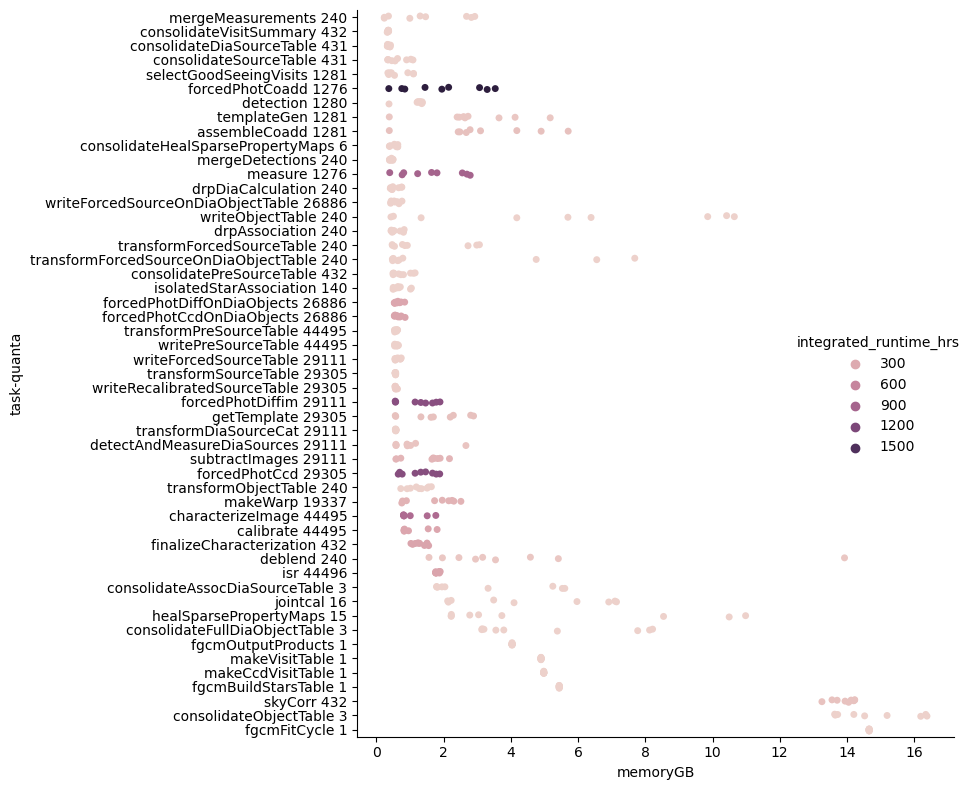

In [54]:
mergedqq =  pd.merge(qq03, labelDF, left_on="task", right_on="task")
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
ax = sns.catplot(data=mergedqq[(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") & (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('memoryGB'), 
            y="task-quanta", x="memoryGB", hue="integrated_runtime_hrs", height=8)

#ax.set_xticklabels(ax.ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# plt.savefig('figures/w50_memory.png')
plt.show()

In [32]:
qq03['version'] = "w_2023_03"
qq48['version'] = "w_2022_48"
both = pd.concat([qq03, qq48])

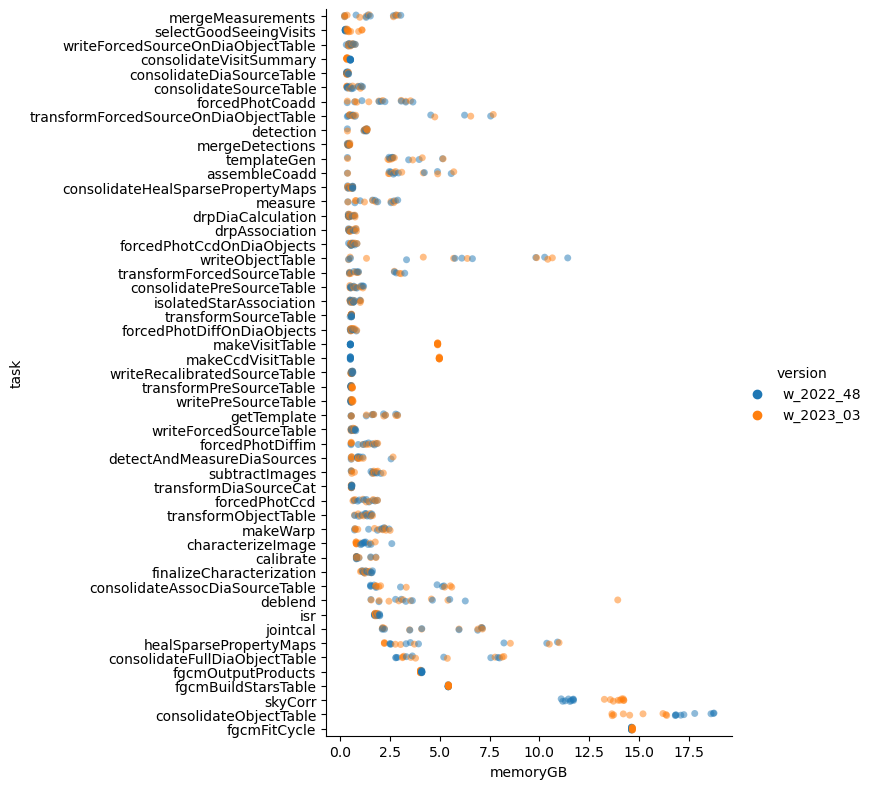

In [53]:
mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task")
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))

ax = sns.catplot(data=mergedqq[(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") & (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('memoryGB'), 
            y="task", x="memoryGB", hue="version", height=8, alpha=0.5)

#plt.savefig('figures/w50_runtime.png')
